# Image Stacking
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [stacking.ipynb](https://github.com/diegoinacio/computer-vision-notebooks/blob/master/Computer-Vision-Fundamentals/stacking.ipynb)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import imageio
import numpy as np
import scipy.stats as stats
import glob

from _utils import *

## 1. Sample
---

In [2]:
sample = imageio.imread('../_data/SEQ01-32bits/sample.0001.exr')

### 1.1. Sample analysis
---

In [3]:
print('sample 0001')
summary(sample)

sample 0001
                          R               G               B
       min:          0.0294          0.0204          0.0148
  1st Quar:          0.1513          0.1422          0.1306
    median:          0.2340          0.2164          0.1900
      mean:          0.3025          0.2680          0.2191
  3rd Quar:          0.3858          0.3417          0.2785
       max:         71.7715         47.6547         24.3402
     sigma:          0.3659          0.2595          0.1554


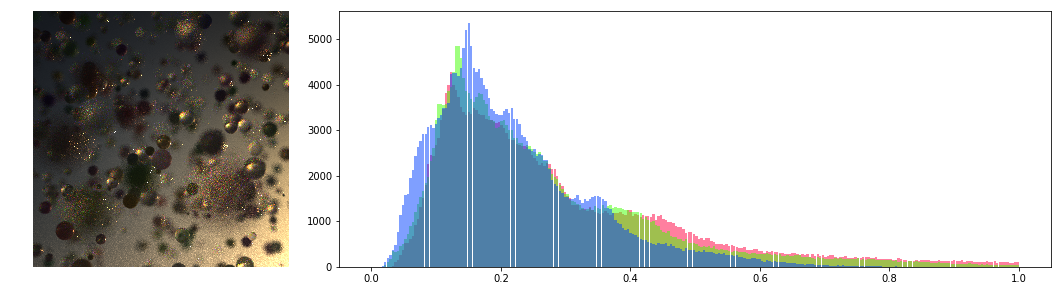

In [4]:
histogram(sample, interval=[0, 1])

### 1.2. Colorspace transformation
---
Transform from *linear* to *sRGB* usign gamma correction $\large \gamma = 2.2$.

In [5]:
sample_sRGB = sample**(1/2.2)

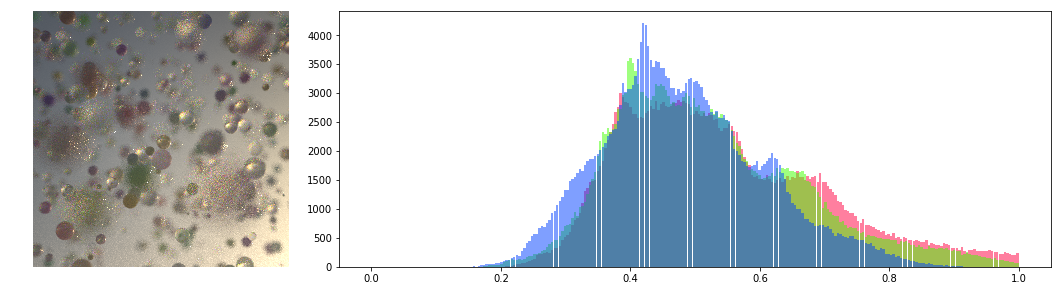

In [6]:
histogram(sample_sRGB, interval=[0, 1])

## 2. Stacking
---

In [7]:
def stackRead(pathname):
    '''
    pathname defined by "glob" pattern.
    i.e.: "directory/sequence_folder/image_*.jpg"
    '''
    # List of image in pathname folder
    SEQ_IMG = glob.glob(pathname)
    n = len(SEQ_IMG)
    # sample for stack definition
    sample = imageio.imread(SEQ_IMG[0])
    # x and y are the dimensions
    # c is the number of channels
    y, x, c = sample.shape
    # define stack
    stack = np.zeros((n, y, x, c), dtype=sample.dtype)
    # image stacking
    for FILE in SEQ_IMG:
        index = SEQ_IMG.index(FILE)
        stack[index] = imageio.imread(FILE)
    # output
    return stack

In [8]:
stack = stackRead('../_data/SEQ01-32bits/sample.*.exr')

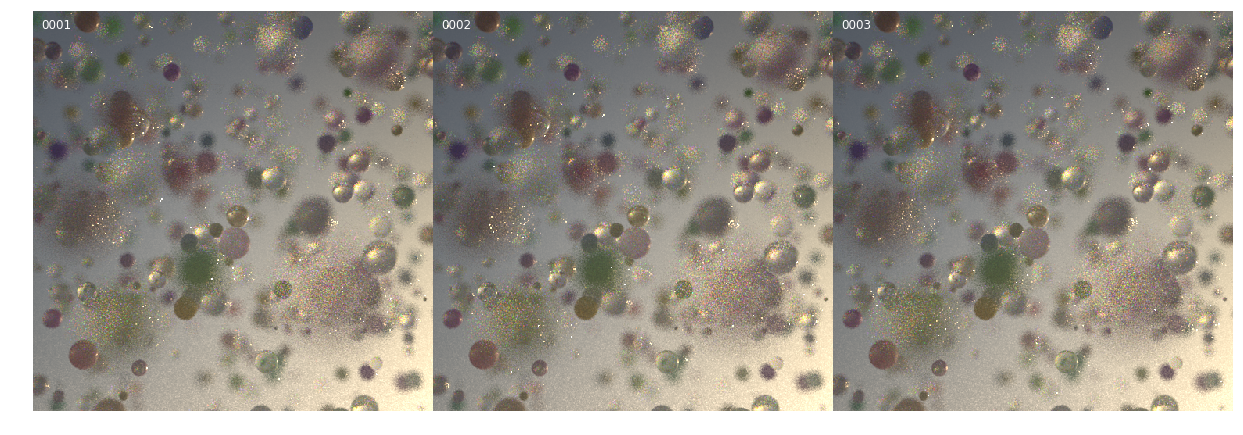

In [9]:
panel(stack**(1/2.2), (3, 1),
      interval=[0, 1],
      dims=(1200, 400),
      texts=['{:04}'.format(i + 1) for i in range(10)])

## 3. Blend operations
---

In [10]:
def blendStack(stack, modo='median', axis=0):
    if modo == 'sum':
        blend = np.sum(stack, axis)
        
    if modo == 'arithmetic mean':
        blend = np.mean(stack, axis)
    
    if modo == 'geometric mean':
        blend = stats.gmean(stack, axis)
    
    if modo == 'harmonic mean':
        blend = stats.hmean(stack, axis)
    
    if modo == 'median':
        blend = np.median(stack, axis)
    
    if modo == 'minimum':
        blend = np.amin(stack, axis)

    if modo == 'maximum':
        blend = np.amax(stack, axis)

    if modo == 'curtosis':
        blend = stats.kurtosis(stack, axis)

    if modo == 'variance':
        blend = np.var(stack, axis)

    if modo == 'standard deviation':
        blend = np.std(stack, axis)

    return blend.astype(stack.dtype)

### 3.1. Analysis
---

In [11]:
median = blendStack(stack)
summary(median)

                          R               G               B
       min:          0.0344          0.0230          0.0167
  1st Quar:          0.1516          0.1433          0.1319
    median:          0.2307          0.2143          0.1851
      mean:          0.2911          0.2606          0.2128
  3rd Quar:          0.3766          0.3335          0.2688
       max:          2.4678          1.6451          0.8355
     sigma:          0.2001          0.1651          0.1150


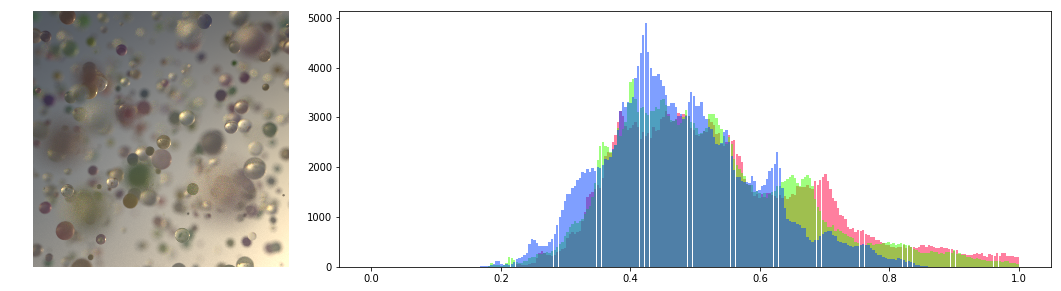

In [12]:
histogram(median**(1/2.2), interval=[0, 1])

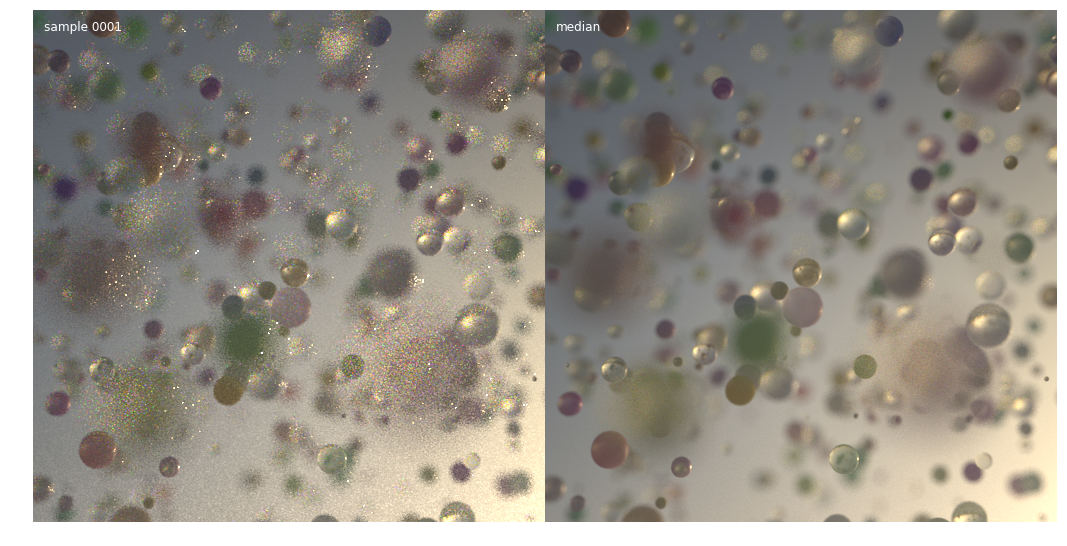

In [13]:
sample_blend = np.array([stack[0]**(1/2.2), median**(1/2.2)])
panel(sample_blend, (2, 1),
      interval=[0, 1],
      texts=['sample 0001', 'median'])

## 4. Examples
---

### 4.1. Sum
---

In [14]:
blend = blendStack(stack**(1/2.2), modo='sum')
summary(blend)

                          R               G               B
       min:          6.8831          5.8026          4.9726
  1st Quar:         13.7512         13.3464         12.8770
    median:         16.6397         16.0336         15.0072
      mean:         17.5535         16.7477         15.4227
  3rd Quar:         20.7067         19.5605         17.7030
       max:         58.8951         49.4278         36.5980
     sigma:          5.0968          4.5682          3.7053


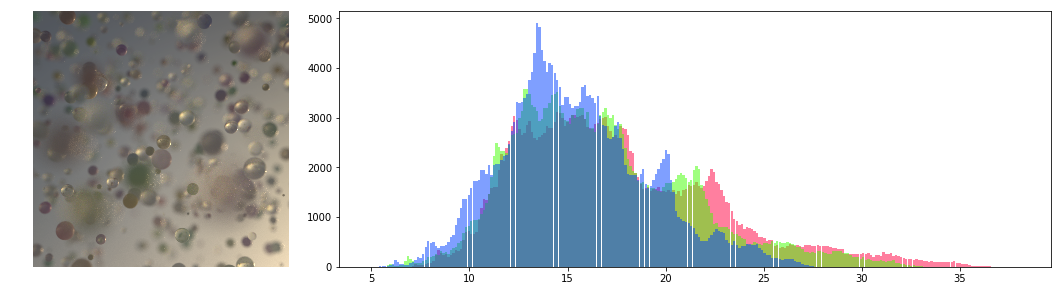

In [15]:
histogram(blend, interval=[5, 38])

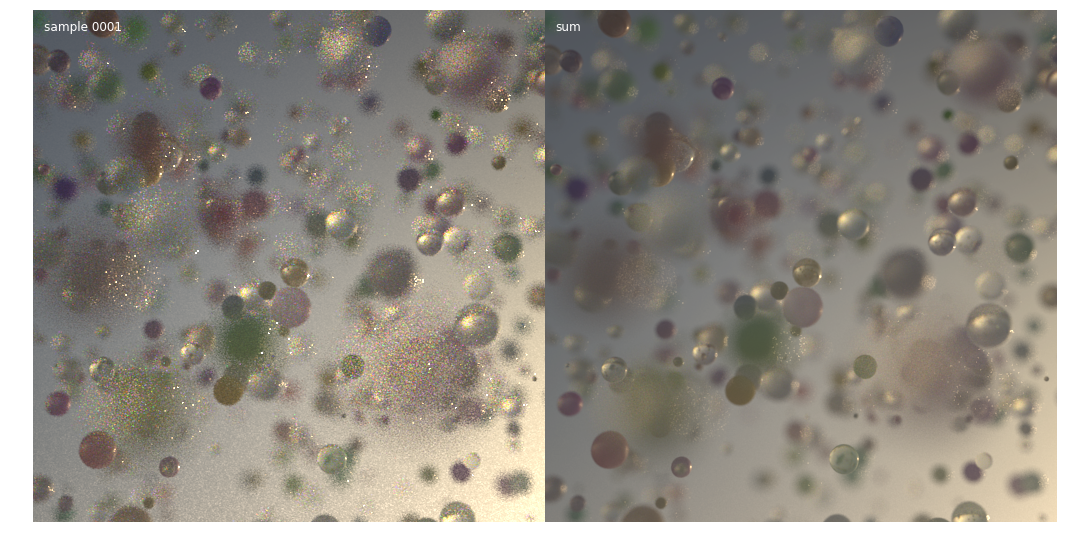

In [16]:
sample_blend = np.array([stack[0]**(1/2.2), (blend - 5)/(38 - 5)])
panel(sample_blend, (2, 1),
      interval=[0, 1],
      texts=['sample 0001', 'sum'])

### 4.2. Means
---

In [17]:
mean_a = blendStack(stack**(1/2.2), modo='arithmetic mean')
mean_g = blendStack(stack**(1/2.2), modo='geometric mean')
mean_h = blendStack(stack**(1/2.2), modo='harmonic mean')

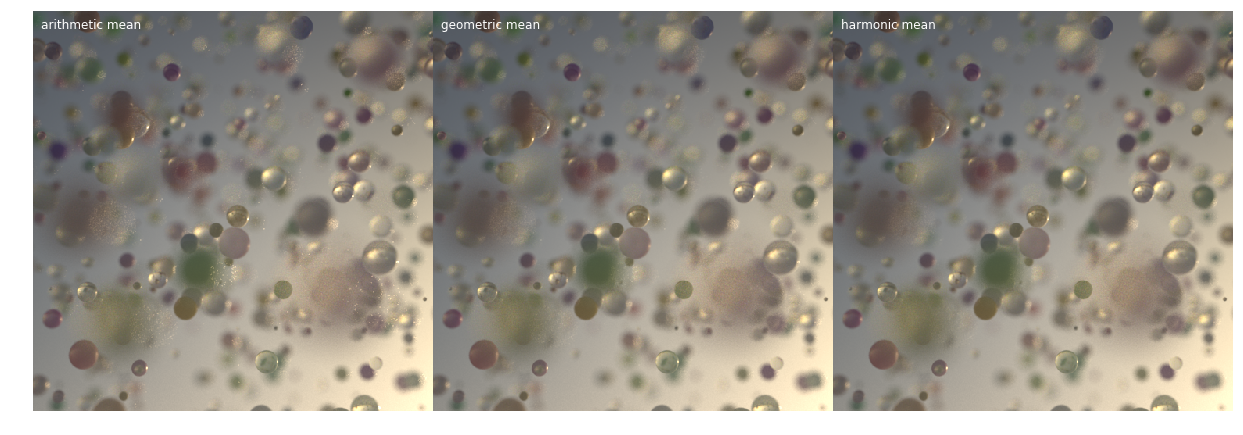

In [18]:
sample_blend = np.array([mean_a, mean_g, mean_h])
panel(sample_blend, (3, 1),
      dims=(1200, 400),
      interval=[0, 1],
      texts=['arithmetic mean', 'geometric mean', 'harmonic mean'])

### 4.3. Extremes
---

In [19]:
minimum = blendStack(stack**(1/2.2), modo='minimum')
maximum = blendStack(stack**(1/2.2), modo='maximum')

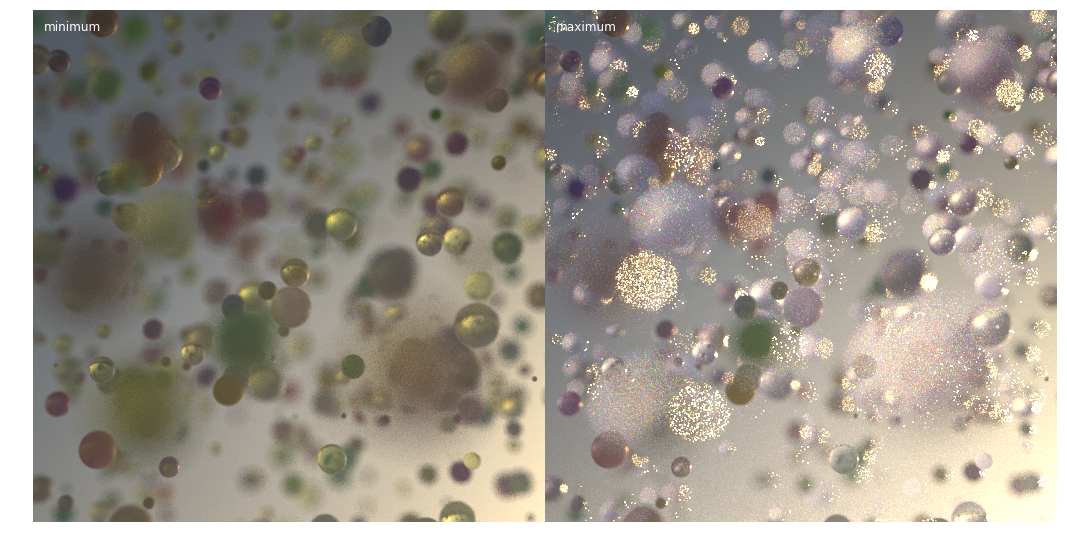

In [20]:
sample_blend = np.array([minimum, maximum])
panel(sample_blend, (2, 1),
      interval=[0, 1],
      texts=['minimum', 'maximum'])